# Data Visualization

## Seaborn

```bash
Seaborn is a Python library used for statistical data visualization. It is built on top of Matplotlib but makes it easier to create beautiful, informative, and complex visualizations with less code.

It also integrates well with pandas DataFrames, allowing you to pass in columns directly for axes and hue (color categories).

It supports:

Conditional plots (like color by category)

Aggregations (like showing means, confidence intervals)

Automatic aesthetics (color themes, grids, palettes)

Plot types like violin, box, swarm, heatmaps, and more

In [16]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df1 = pd.read_excel('D:Btech_CS\Python\Data_Visualization\online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('D:Btech_CS\Python\Data_Visualization\online_retail_II.xlsx', sheet_name='Year 2010-2011')


<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\darzu\AppData\Local\Temp\ipykernel_1176\1713999042.py:1: SyntaxWarning: invalid escape sequence '\B'
  df1 = pd.read_excel('D:\Btech_CS\Python\Data_Visualization\online_retail_II.xlsx', sheet_name='Year 2009-2010')
C:\Users\darzu\AppData\Local\Temp\ipykernel_1176\1713999042.py:2: SyntaxWarning: invalid escape sequence '\B'
  df2 = pd.read_excel('D:\Btech_CS\Python\Data_Visualization\online_retail_II.xlsx', sheet_name='Year 2010-2011')


In [35]:
df = pd.concat([df1, df2], ignore_index=True) # Concatenate the two DataFrames without resetting the index

In [36]:
df_quantity = df[(df['Quantity'] > 0) & (df['Quantity'] < 100)]

df_quantity.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


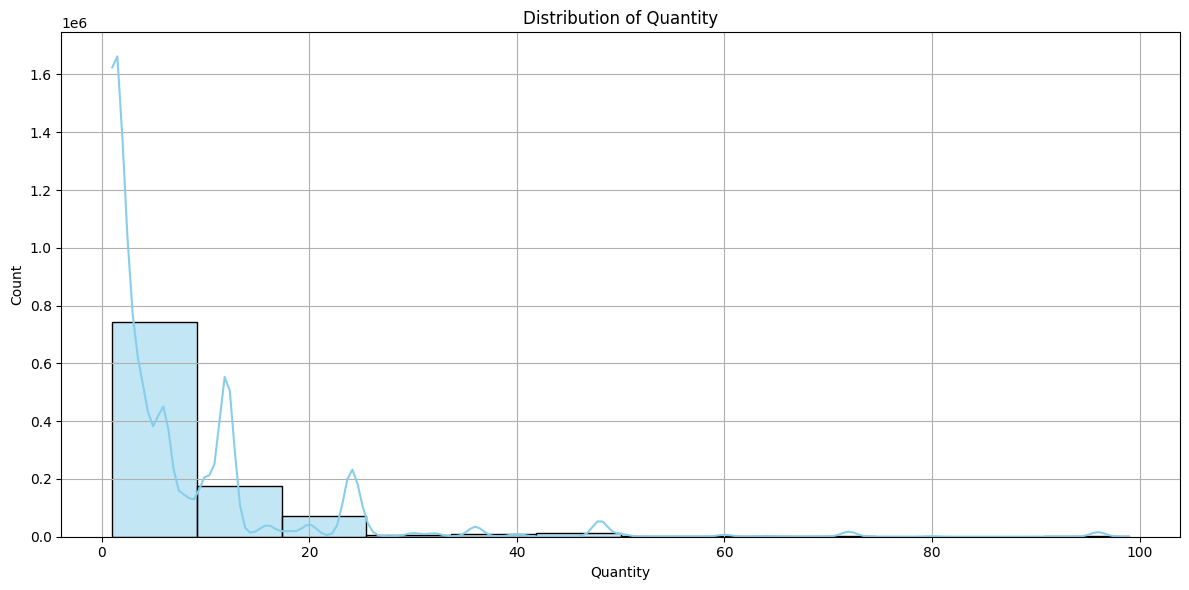

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df_quantity['Quantity'],bins =12 ,kde= True ,color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## Catogorical data visualization

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### Top contries by revenue top 10

In [48]:
df['Revenue'] = df['Quantity'] * df['Price'] # (feature engineering)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str) # (feature engineering)

top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)



C:\Users\darzu\AppData\Local\Temp\ipykernel_1176\3104011613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


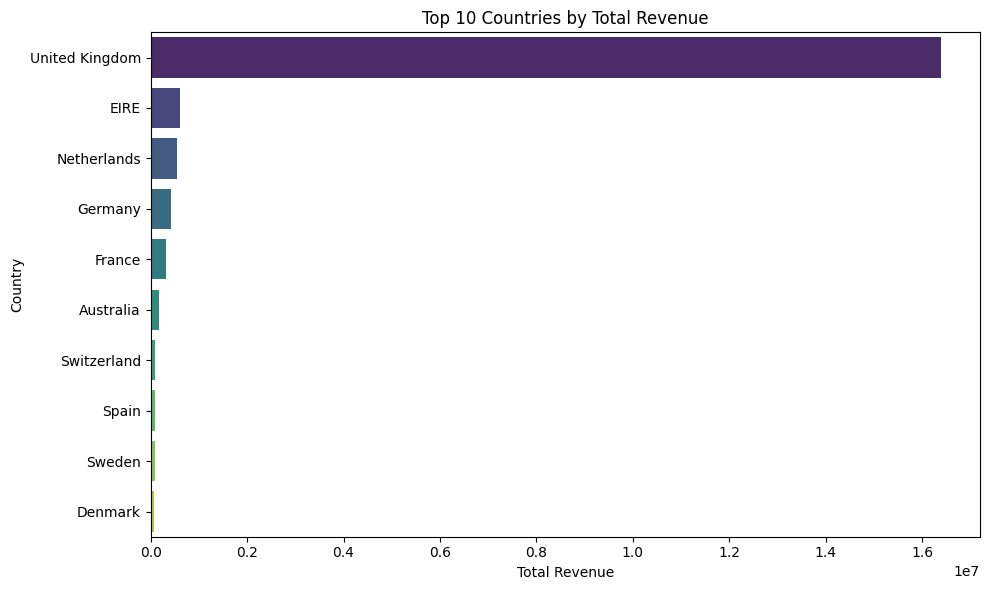

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [50]:
# Number of Transactions by Country (Count Plot)
df_sample = df[['Quantity', 'Price', 'Revenue', 'Country', 'Month']].copy()

df_sample.head()

,Quantity,Price,Revenue,Country,Month
0,12,6.95,83.4,United Kingdom,2009-12
1,12,6.75,81.0,United Kingdom,2009-12
2,12,6.75,81.0,United Kingdom,2009-12
3,48,2.10,100.8,United Kingdom,2009-12
4,24,1.25,30.0,United Kingdom,2009-12


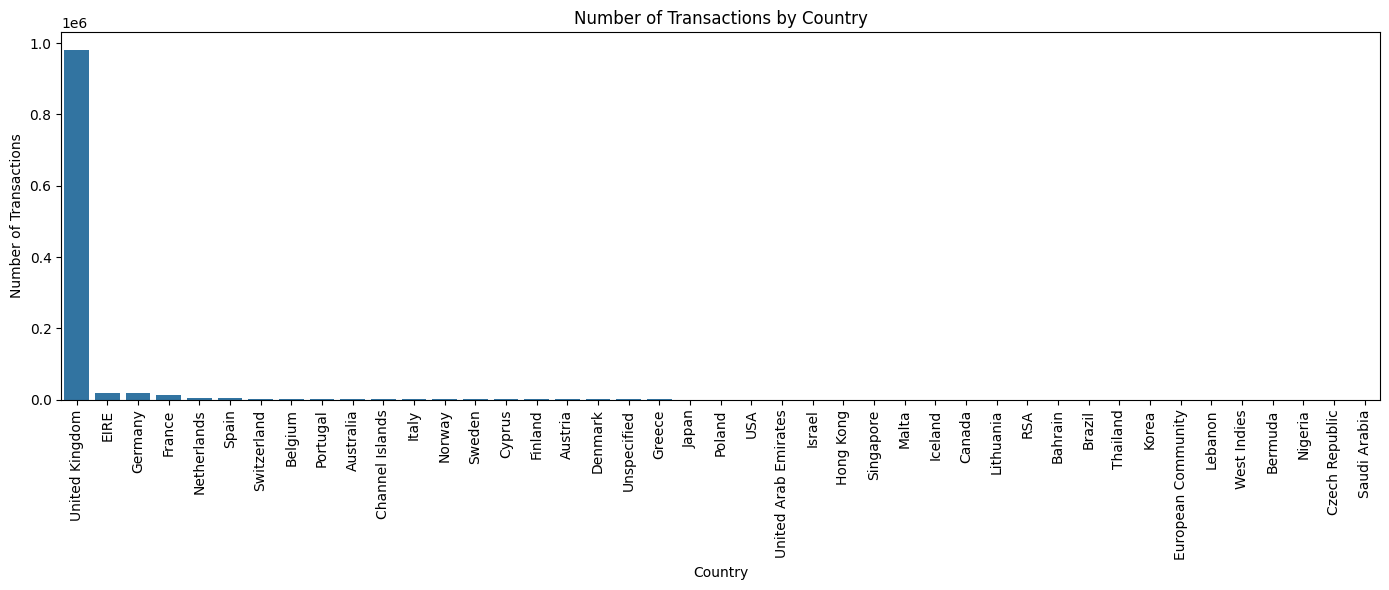

In [51]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_sample, x='Country', order=df_sample['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [52]:
# Top 5 countries by number of transactions

top_countries = df['Country'].value_counts().head(5).index.tolist()

# Filter df to keep only those countries
df_top = df[df['Country'].isin(top_countries)].copy()

# Group by Country and Month, Sum the revenue
grouped = df_top.groupby(['Country', 'Month'])['Revenue'].sum().reset_index()

In [53]:
grouped['Month'] = pd.to_datetime(grouped['Month'])
grouped = grouped.sort_values('Month')
grouped['Month'] = grouped['Month'].dt.strftime('%Y-%m')

# sort the data by YEAR-month

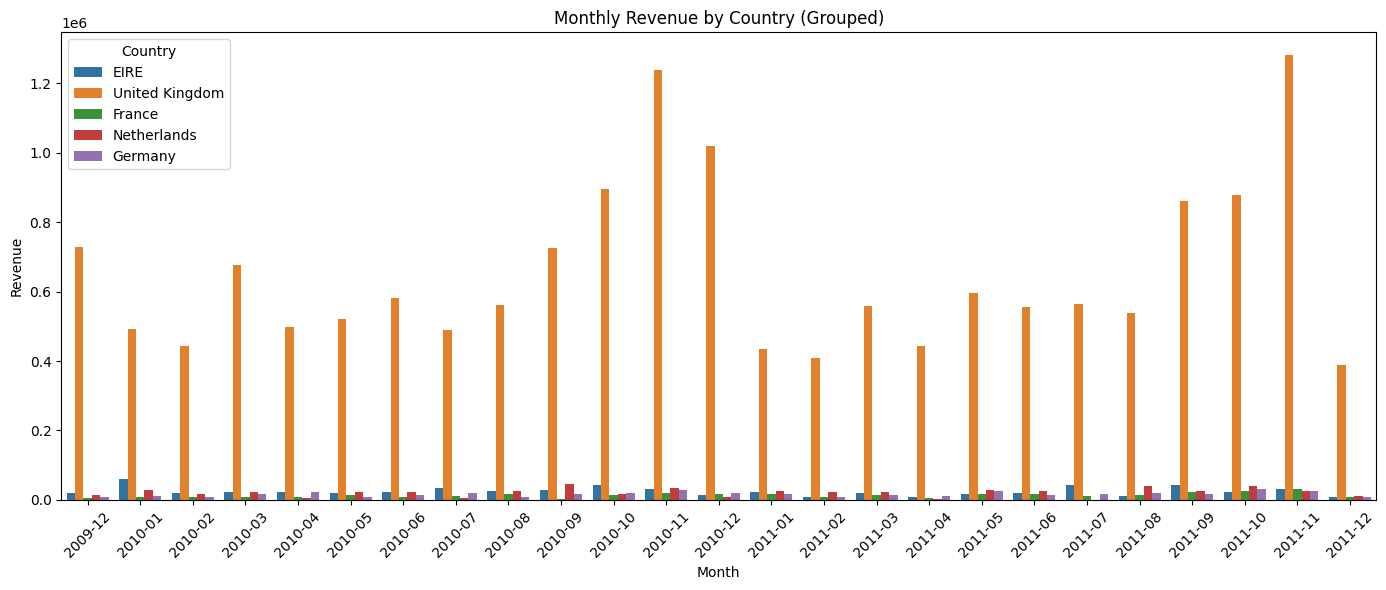

In [54]:
# Grouped Bar Plot using Seaborn

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='Month', y='Revenue', hue='Country')
plt.title('Monthly Revenue by Country (Grouped)')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Country')
plt.show()

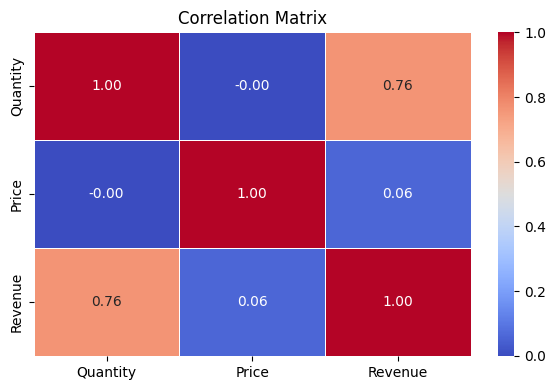

In [56]:
# sns.heatmap() Correlation Matrix

corr_matrix = df_sample[['Quantity', 'Price', 'Revenue']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

C:\Users\darzu\AppData\Local\Temp\ipykernel_1176\932696592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sample[df_sample['Country'].isin(['Germany', 'France', 'United Kingdom'])],


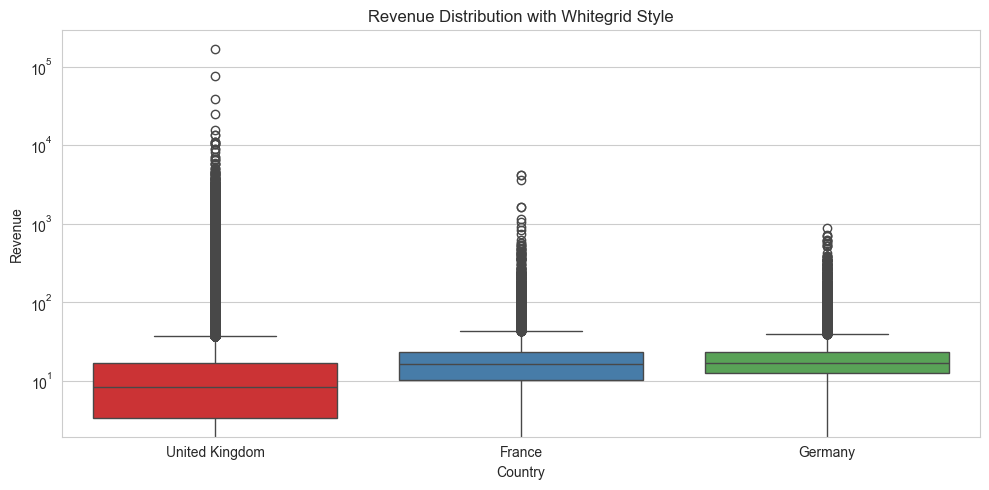

In [57]:
# styles and themes

sns.set_style("whitegrid")  # sets overall look

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_sample[df_sample['Country'].isin(['Germany', 'France', 'United Kingdom'])],
            x='Country', y='Revenue', palette='Set1')
sns.despine(left=False, bottom=False, top=False, right=False)  # removes top and right border

plt.title("Revenue Distribution with Whitegrid Style")
plt.yscale('log')
plt.tight_layout()
plt.show()

In [58]:
# Combining Plots with FacetGrid

top3 = ['United Kingdom', 'Germany', 'France']
df_subset = df[df['Country'].isin(top3)].copy()

df_subset_grouped = df_subset.groupby(['Month', 'Country'])['Revenue'].sum().reset_index()

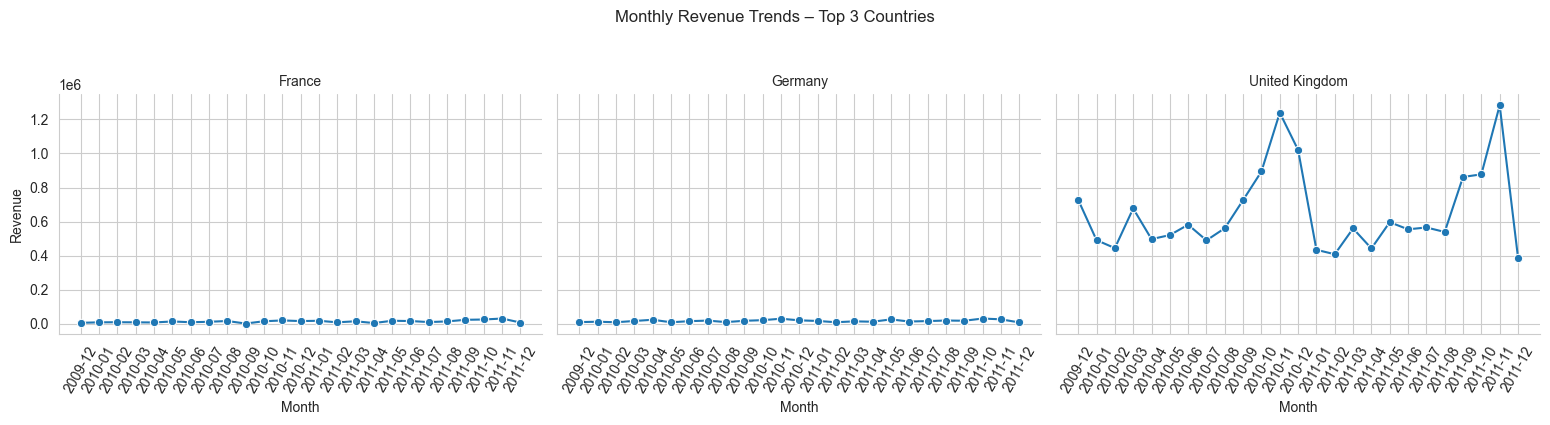

In [59]:
g = sns.FacetGrid(df_subset_grouped, col='Country', col_wrap=3, height=4, aspect=1.3)
g.map_dataframe(sns.lineplot, x='Month', y='Revenue', marker='o')
g.set_titles("{col_name}")
g.set_xticklabels(rotation=60)
g.figure.suptitle("Monthly Revenue Trends – Top 3 Countries", y=1.05)
plt.tight_layout()
plt.show()